In [6]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

import os
import tensorflow

In [2]:
batch_size = 64
num_classes = 10
epochs = 50

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train.shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape :  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train[1]

array([9], dtype=uint8)

In [7]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
def residual_block(x, nkernels = 8):
  identity = x

  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(nkernels, 3, activation=None, kernel_initializer='he_normal', padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(nkernels, 3, activation=None, kernel_initializer='he_normal', padding='same')(x)

  return Activation('relu')(x + identity)

In [10]:
def model(sz=(32,32,3)):
  inputs = Input(sz)
  
  x = Conv2D(8,3, activation=None, kernel_initializer='he_normal', padding='same')(inputs)
  
  x = residual_block(x)
  x = MaxPooling2D()(x)
  x = residual_block(x)
  x = MaxPooling2D()(x)
  x = residual_block(x)
  x = MaxPooling2D()(x)
  x = Flatten()(x)
  last = Dense(10,activation='softmax')(x)
  
  model = Model(inputs=inputs, outputs=last)
  model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [11]:
residual_model = model()

In [12]:
residual_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 8)    224         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 8)    32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 8)    0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
trained_model = residual_model.fit(x_train,y_train, batch_size=batch_size,
                                   epochs=epochs
                                   ,validation_data=(x_test,y_test),
                                   shuffle=True)

Epoch 1/50
782/782 [==============================] - 39s 8ms/step - loss: 1.8335 - accuracy: 0.3370 - val_loss: 1.8372 - val_accuracy: 0.3392
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.4831 - accuracy: 0.4606 - val_loss: 1.5147 - val_accuracy: 0.4531
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3755 - accuracy: 0.5000 - val_loss: 1.3611 - val_accuracy: 0.5030
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.2993 - accuracy: 0.5313 - val_loss: 1.3279 - val_accuracy: 0.5242
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.2359 - accuracy: 0.5559 - val_loss: 1.2522 - val_accuracy: 0.5463
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.1760 - accuracy: 0.5780 - val_loss: 1.1849 - val_accuracy: 0.5745
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.1275 - accuracy: 0.5984 - val_loss: 1.4576 - val_accuracy: 0.5070
Epoch

In [22]:
epochs_range = range(50)
print(trained_model.history)
print(trained_model.history.keys())
validation_accuracy = trained_model.history['val_accuracy']
training_accuracy = trained_model.history['accuracy']

{'loss': [1.8334769010543823, 1.4830681085586548, 1.37545907497406, 1.2993040084838867, 1.235893964767456, 1.1759663820266724, 1.1275464296340942, 1.0962040424346924, 1.06881844997406, 1.0447485446929932, 1.026107668876648, 1.010591745376587, 0.9946355223655701, 0.9792935252189636, 0.9671753644943237, 0.9580295085906982, 0.9486027956008911, 0.9378054738044739, 0.9280350804328918, 0.9216258525848389, 0.9124934077262878, 0.906765341758728, 0.9042941927909851, 0.8957657217979431, 0.8903532028198242, 0.8852856755256653, 0.8806427121162415, 0.8778669238090515, 0.8730667233467102, 0.8669783473014832, 0.8619470596313477, 0.8599385023117065, 0.8549243211746216, 0.8521654009819031, 0.8489768505096436, 0.8478867411613464, 0.8419650793075562, 0.8409141898155212, 0.8369027972221375, 0.835769534111023, 0.8342205286026001, 0.8313754200935364, 0.8284389972686768, 0.8267154097557068, 0.8229255676269531, 0.8202793002128601, 0.8200817108154297, 0.8175103068351746, 0.8152833580970764, 0.8135371208190918]

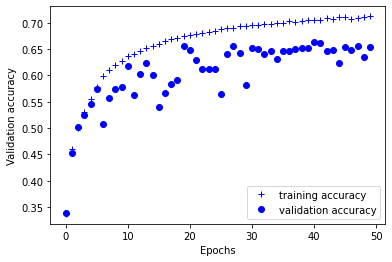

In [23]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [26]:
scores = residual_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0259 - accuracy: 0.6539
Test loss: 1.0258840322494507
Test accuracy: 0.6539000272750854
